In [1]:
import json
import pandas as pd

jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [5]:
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [6]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos something to vote for on november 8 , 2016 : elect 279 candidates on election day and the united states leads the world in fighting climate change !",0
"xxbos boy scout officials : ' we believe all children , regardless of gender , deserve the opportunity to one day die alone in the woods '",1
"xxbos he told his boyfriend , ' i love you . ' his boyfriend 's response brought him to tears . ( video )",0
"xxbos jake hyland of kansas city , mo chosen as nation 's designated survivor in case rest of country wiped out during presidential address",1


In [7]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, callback_fns=ShowGraph)
learn.load_encoder('learn-stage2-enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


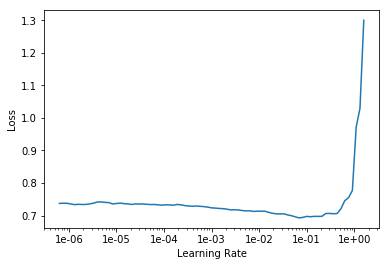

In [6]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.613079,0.568831,0.692539,00:11
1,0.601769,0.573398,0.693291,00:10
2,0.610570,0.564039,0.679759,00:11
3,0.602495,0.561824,0.694418,00:10
4,0.595474,0.545885,0.707198,00:10
5,0.604183,0.562624,0.702875,00:11
6,0.602081,0.563641,0.706070,00:10
7,0.590725,0.545927,0.702124,00:11
8,0.601956,0.541931,0.712084,00:11
9,0.604973,0.543594,0.712648,00:11


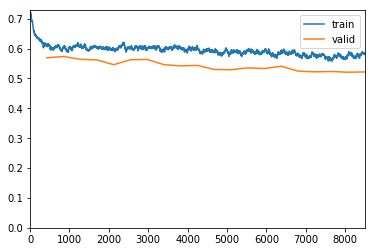

Better model found at epoch 0 with accuracy value: 0.6925389766693115.
Better model found at epoch 1 with accuracy value: 0.6932907104492188.
Better model found at epoch 3 with accuracy value: 0.6944183707237244.
Better model found at epoch 4 with accuracy value: 0.707197904586792.
Better model found at epoch 8 with accuracy value: 0.712084174156189.
Better model found at epoch 9 with accuracy value: 0.7126479744911194.
Better model found at epoch 10 with accuracy value: 0.7214809060096741.
Better model found at epoch 11 with accuracy value: 0.7222326397895813.
Better model found at epoch 15 with accuracy value: 0.7246758341789246.
Better model found at epoch 16 with accuracy value: 0.7263672351837158.
Better model found at epoch 19 with accuracy value: 0.7265551686286926.


In [7]:
learn.fit_one_cycle(20, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

In [9]:
learn.save("learn-clas-stage1")
learn.save_encoder("learn-clas-stage1-enc")

epoch,train_loss,valid_loss,accuracy,time
0,0.679210,0.624939,0.665476,00:10
1,0.638298,0.584482,0.695734,00:10
2,0.618828,0.560958,0.705507,00:10
3,0.599217,0.544511,0.724864,00:11
4,0.609006,0.542214,0.725991,00:10
5,0.596657,0.538596,0.726179,00:10
6,0.603824,0.541438,0.732005,00:11
7,0.592628,0.531126,0.730690,00:10
8,0.587227,0.533843,0.729938,00:10
9,0.590897,0.530544,0.732757,00:11


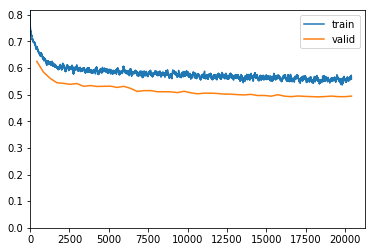

Better model found at epoch 0 with accuracy value: 0.6654764413833618.
Better model found at epoch 1 with accuracy value: 0.695733904838562.
Better model found at epoch 2 with accuracy value: 0.7055065035820007.
Better model found at epoch 3 with accuracy value: 0.7248637676239014.
Better model found at epoch 4 with accuracy value: 0.7259913682937622.
Better model found at epoch 5 with accuracy value: 0.726179301738739.
Better model found at epoch 6 with accuracy value: 0.73200523853302.
Better model found at epoch 9 with accuracy value: 0.7327569723129272.
Better model found at epoch 10 with accuracy value: 0.7352001667022705.
Better model found at epoch 12 with accuracy value: 0.7368915677070618.
Better model found at epoch 14 with accuracy value: 0.7417778372764587.
Better model found at epoch 15 with accuracy value: 0.7462882995605469.
Better model found at epoch 16 with accuracy value: 0.7483555674552917.
Better model found at epoch 22 with accuracy value: 0.7513625025749207.
Bett

In [ ]:
learn.load_encoder("learn-clas-stage1-enc")
learn.fit_one_cycle(50, 1e-3, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

In [ ]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")